[TOC]

# 分类算法

## Logistic Regression
* Logistic Regression 事实上是广义线性回归，将普通线性回归（OLS）的结果，对应到二元分类里面

### 模型
* 考虑到函数性质（可微），我们选取sigmoid函数将OLS结果转化成｛0，1｝变量。sigmoid函数图像（[代码见附录](#附录1)）如下所示:
$$y=\frac{1}{1+e^{-x}}$$
<div align="center"><img src="ML_pic\sigmoid.png"></div>
* 从而，我们令
$$样本方程： h_i=\frac{1}{1+e^{X_{i}^{T}\beta}} \Rightarrow \ln\frac{h_i}{1-h_i} = X_{i}^{T}\beta$$ 
$$总体方程： H=\frac{1}{1+e^{X\beta}}$$  
其中：  
$$X = \begin{bmatrix}
      1      & x_{1}^{1} & x_{1}^{2} & \cdots & x_{1}^{d} \\
      \vdots & \vdots    & \vdots    & \ddots & \vdots    \\
      1      & x_{n}^{1} & x_{n}^{2} & \cdots & x_{n}^{d} 
      \end{bmatrix} \qquad
  X_i =  \begin{bmatrix}
      1      & x_{i}^{1} & x_{i}^{2} & \cdots & x_{i}^{d} 
      \end{bmatrix}^T
$$
$$
  Y =  \begin{bmatrix}
      y_{1}     & y_{2} & y_{3} & \cdots & y_{n}
      \end{bmatrix}^T \qquad
  \beta =  \begin{bmatrix}
      \beta_{1}     & \beta_{2} & \beta_{3} & \cdots & \beta_{n}
      \end{bmatrix}^T
$$


**如果我们把$h_i$看成是第$i$个样本分类为1的概率的话，这个模型会得到很好的理论解释。**

### 梯度下降法
* 损失函数（Loss Function）：  
    应用MLE，我们有似然函数：
    $$
    L(\beta) = \prod_{i=1}^{n}h_{i}^{y_i}(1-h_i)^{1-y_i}
    $$
    因此，有损失函数：
    $$
    l(\beta) = -\frac{1}{n}\sum_{i=1}^{n}[{y_i}\ln(h_i) + {(1-y_i)}\ln(1-h_i)]
    $$
    从而，我们的问题变成了：
    $$
    \hat{\beta} = arg\min_{\beta}l(\beta)
    $$

* 梯度下降法（Gradient Descend）:  
    1. 梯度（Gradient）  
       简单来说，梯度是函数导数的**反方向**。也就是说，梯度是一个**向量**。
    2. Idea  
       GD是求解***凸优化问题***的一种方法。比如函数$y=x^2$,给定任一点$x_0$,从这点出发，沿着梯度方向走，随着走的步数越来越多，其对应的函数值就越接近其最值。如图所示（[代码见附录](#附录1)）：  <div align="center"><img src="ML_pic\GD_pic.png"></div>
    3. 算法实现  
       ① 任意$x_0$，计算梯度$d_0 = -\frac{\partial f}{\partial x}|_{x=x_0}$  
       ② 选择步长（学习率）$\alpha$，更新公式为$x_1 = x_0 + \alpha d_0$  
       ③ 以此类推，可以通过判定阀值$\epsilon$，要求$\mid f(x_{k+1})-f(x_k) \mid \le \epsilon$；
          或者，选择设定最大迭代次数$k$，来停止迭代。
    4. 用GD求解Logistic Regression  
       ① diff $l(\beta)$ w.r.t. $\beta$ :
       $$
       \frac{\partial l}{\partial \beta} = -\frac{1}{n}\sum_{i=1}^{n}X_{i}^{T}(y_i-h_i)
       = -\frac{1}{n}X^T(y-h)
       $$  
       ② update:$\beta = \beta + \alpha \frac{\partial l}{\partial \beta}$
       

### 算法实现
* 导入数据集  
   #这个note的所有数据集都可以在我的[GitHub](https://github.com/ocsphylee/Training_dataSet.git)主页找到

In [73]:
import numpy as np


def load_data(path):
    """ load data from txt file
    this function requires data structure to be [features, label]

    input:  path(str): the path of data file
    output: label(mat): an n*1 matrix of label
            features(mat): a n*(d+1) matrix of features
    """
    lines = []
    with open(path) as f:
        for line in f.readlines():
            lines.append(line.split())
    raw_data = np.array(lines, dtype=float)

    n = raw_data.shape[0]
    label = raw_data[:, -1].reshape((n, 1))
    features = raw_data.copy()
    features[:, -1] = 1

    return np.mat(label), np.mat(features)

* 定义sigmoid函数，并实现梯度下降

In [74]:
def sig(x):
    return 1 / (1 + np.exp(-x))


def logit_gd(features, label, max_cycle, step):
    """train Logistic model with Gradient Descend
    
    input:  features(mat): a n*(d+1) matrix of features
            label(mat): an n*1 matrix of label
            max_cycle(int): maximum iteration times
            step(float): learning ratio
    output: beta(mat): a (d+1)*1 matrix of parameters
    """
    n, d = features.shape
    # initialize beta
    beta = np.ones((d,1))

    while max_cycle:
        max_cycle -= 1
        # calculate the gradient
        err = label - sig(features * beta)
        gd = features.T * err
        
        # track the approximate error (not necessary)
        if max_cycle % 100 == 0:
            error = np.sum(err) /n
            print("error: {} {}".format(max_cycle, error))
            
        # update beta
        beta += step * gd

    return beta

* 计算预测值和准确率

In [75]:
def get_predict(features, beta):
    """predict label uses trained model
    input:  features(mat): a n*(d+1) matrix of features
            beta(mat): a (d+1)*1 matrix of parameters
    output: prediction(mat): a n * 1 predicted value of label
    """
    h = sig(features * beta)
    n = features.shape[0]
    predict_label = []
    for i in range(n):
        if h[i,0]>0.5:
            predict_label.append(1)
            continue
        predict_label.append(0)
    prediction = np.array(predict_label).reshape((n,1))

    return prediction

def get_accuracy(label, prediction):
    """calculate the accuracy of the model
    input:  label(mat): an n*1 matrix of label
            prediction(mat): a n * 1 predicted value of label
    output: acc(float): accuracy of the model
    """
    n = label.shape[0]
    result = 0
    for i in range(n):
        if label[i,0] == prediction[i,0]:
            result += 1
    acc = result / n
    return acc

* 运行

In [ ]:
if __name__ == "__main__":
    label, features = load_data("data/1.logit_data.txt")
    beta = logit_gd(features, label, 1000, 0.01)
    prediction = get_predict(features,beta)
    accuracy = get_accuracy(label,prediction)
    print(beta)

  
--------------------------------------------------------------------------------------------
  

## Factorization Machine

In [41]:
import numpy as np


def load_data(path):
    '''load data
    input: path(str): file path
    output: feature(mat,n*k), label(mat,n*1)
    '''
    data = np.loadtxt(path)
    n = data.shape[1]-1  # number of coefficient
    feature = np.mat(data[:,:n])
    label = np.mat(data[:, -1]*2-1).T
    return feature, label

In [48]:
def sigmoid(x):
    ''' sigmoid function
    '''
    return 1/(1+np.exp(-x))


def FM_train_SGD(feature, label, k, max_iter, step):
    '''
    '''
    # initialize
    m, n = feature.shape
    beta_0 = 0
    beta = np.zeros((n, 1))
    v = np.random.normal(0, 0.2, n*k).reshape((n, k))
    # train
    for it in range(max_iter):
        for x in range(m):
            # calculate the interaction part
            inter1 = np.array(feature[x]*v)
            x_ary = np.array(feature[x])
            inter2 = np.dot((x_ary**2), (v**2))
            interaction = np.sum(inter1**2 - inter2)/2.
            p = beta_0 + feature[x] * beta + interaction  # predition value
            loss = sigmoid(label[x] * p[0, 0])-1

            # update beta0
            beta_0 -= step * loss * label[x]
            for i in range(n):
                if feature[x, i] != 0:
                    # update beta
                    beta[i, 0] -= step * loss * label[x] * feature[x, i]
                    # update v
                    for j in range(k):
                        partial_v = feature[x, i] * inter1[0, j] -\
                            v[i, j] * (feature[x, i]**2)
                        v[i, j] -= step * loss * label[x] * partial_v
        if it % 1000 == 0:
            print(it)

    return beta_0, beta, v

### 附录1
* sigmoid 图像绘制

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sig(x):
    return 1/(1 + np.exp(-x))


x = np.linspace(-10, 10, 100)
y = np.ones((100,))
plt.plot(x, sig(x))
plt.plot(x, y, c='grey', linestyle='--')
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
ax.spines['left'].set_position(('data', 0))  # 移动左坐标轴到数据为0的位置

* GD图示

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2
x = np.linspace(-10, 10, 100)

step = 10
x0 = 8
while step>0:
    step -= 1 
    x1 = x0 - 2 * x0*0.245
    plt.scatter(x0,f(x0),c="r",s=10)
    plt.plot([x0,x1],[f(x0),f(x1)],"r")
    x0 = x1
plt.plot(x,f(x))

ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
ax.spines['left'].set_position(('data', 0))  # 移动左坐标轴到数据为0的位置

* 超平面分隔示意图

In [143]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,2,15)
y = []
z = []

while True:
    y_i = np.random.normal(2,2,1)
    if y_i > 3:
        y.append(y_i[0])
    if len(y) == 15:
        break
        
while True:
    y_i = np.random.normal(1,1,1)
    if y_i < 1:
        z.append(y_i[0])
    if len(z) == 15:
        break

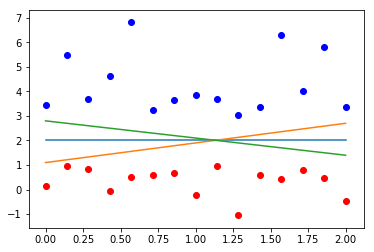

In [148]:
for i in range(15):
    plt.scatter(x[i],y[i],c='b')
    plt.scatter(x[i],z[i],c = 'r')
plt.plot(x,[2 for x in range(15)])
plt.plot(x,0.8*x+1.1)
plt.plot(x,-0.7* x+2.8)

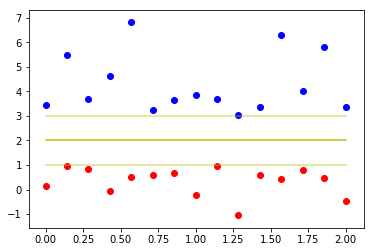

In [153]:
for i in range(15):
    plt.scatter(x[i],y[i],c='b')
    plt.scatter(x[i],z[i],c = 'r')
plt.plot(x,[2 for x in range(15)],"y")
plt.plot(x,[3 for x in range(15)],"y",alpha = 0.5)
plt.plot(x,[1 for x in range(15)],"y",alpha = 0.5)

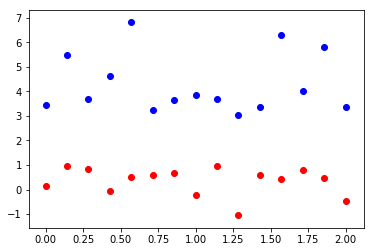

In [154]:
for i in range(15):
    plt.scatter(x[i],y[i],c='b')
    plt.scatter(x[i],z[i],c = 'r')